In [57]:
#importing the necessary libraries of dataset and machine learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering #agglomerative clustering algorithm library
import scipy.cluster.hierarchy as sch # for dendogram diagram



In [58]:
ds = pd.read_csv('C:\\Users\sasta\\OneDrive\\Documents\\Machine learning\\KNN\\k-means\\Mall_Customers.csv')
x = ds.iloc[: , [3,4]].values
#printing the dataset
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [59]:
'''
printing the extracted columns:
here we have taken column 4 (index 3) & column 5 (index 4)
which are the annual income of a person and their spending score( a metric created by the dataset author)

'''
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

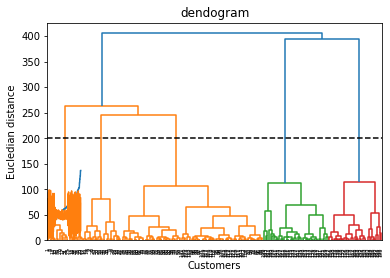

In [60]:
#creating the dendogram to find out the ideal number of clusters

dg = sch.dendrogram(sch.linkage(x , method = 'ward'))
plt.plot(x)
plt.title('dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian distance')
plt.axhline(y = 200, color = 'black', linestyle = 'dashed')
plt.show()

In [61]:
'''
here the dashed black line intersects 5 vertical lines which means that we get 5 clusters as the ideal number of clusters!
this is achived by finding the maximum distance(y-axis) covered by the vertical lines 

we go top down for checking the max distance covered by vertical lines in between the horizontal lines also looking for
the maximum numbers of intersections , since in the above diagram we see the line on y = 200 having the max distance along with
having the max number of intersections we choose this line!

'''

'\nhere the dashed black line intersects 5 vertical lines which means that we get 5 clusters as the ideal number of clusters!\nthis is achived by finding the maximum distance(y-axis) covered by the vertical lines \n\nwe go top down for checking the max distance covered by vertical lines in between the horizontal lines also looking for\nthe maximum numbers of intersections , since in the above diagram we see the line on y = 200 having the max distance along with\nhaving the max number of intersections we choose this line!\n\n'

In [62]:
hc = AgglomerativeClustering(n_clusters = 5 , affinity = 'euclidean' , linkage='ward')
y_hc = hc.fit_predict(x)

y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

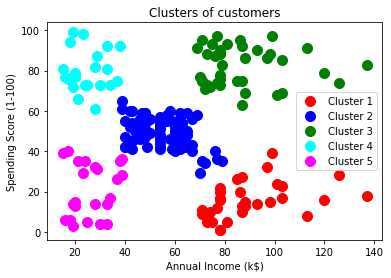

In [63]:
#plotting of the obtained  classes for visual inference of the results of the algorithm

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [64]:
'''
from the obtained graph we can see that:

1. cluster 1 has people of a high annual income but low spending score
2. cluster 4 having low avg. annual income and high spending score
and so on...

Uses of this results:
For business we can target the cluster 1 by sending them offers and information regarding sales happening in the mall
so as to generate more business from them.

As we are a socially responsible business , seeing sector 4 having less annual income but a high spending score , 
we can stop sending them promotions and offer messages so as to save them from spending more.

and much more insights can be generated via looking and inferring the above graph.

'''

'\nfrom the obtained graph we can see that:\n\n1. cluster 1 has people of a high annual income but low spending score\n2. cluster 4 having low avg. annual income and high spending score\nand so on...\n\nUses of this results:\nFor business we can target the cluster 1 by sending them offers and information regarding sales happening in the mall\nso as to generate more business from them.\n\nAs we are a socially responsible business , seeing sector 4 having less annual income but a high spending score , \nwe can stop sending them promotions and offer messages so as to save them from spending more.\n\nand much more insights can be generated via looking and inferring the above graph.\n\n'

In [65]:
#making the data recieved from the clustering algorithm to a dataframe for concatenating it with the original dataframe
y_hc = pd.DataFrame(y_hc , columns=['Clusters(0-4)'])
y_hc


,Clusters(0-4)
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [70]:
#adding the above dataframe into the original dataframe:

ds['Clusters(0-4)'] = y_hc

#creating a new dataframe out of the original one for sorting it in ascending order according to the clusters column

sorted_ds = ds.sort_values('Clusters(0-4)')
sorted_ds.head(50)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters(0-4)
144,145,Male,25,77,12,0
128,129,Male,59,71,11,0
178,179,Male,59,93,14,0
152,153,Female,44,78,20,0
176,177,Male,58,88,15,0
174,175,Female,52,88,13,0
154,155,Female,47,78,16,0
180,181,Female,37,97,32,0
170,171,Male,40,87,13,0
166,167,Male,42,86,20,0


In [90]:
#here were printing only those values for which the value in the clusters column is 0 i.e cluster 1 which
#is what were focusing on for extracting insights from the graph

sorted_ds = sorted_ds[sorted_ds['Clusters(0-4)']== 0]

sorted_ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters(0-4)
144,145,Male,25,77,12,0
128,129,Male,59,71,11,0
178,179,Male,59,93,14,0
152,153,Female,44,78,20,0
176,177,Male,58,88,15,0
174,175,Female,52,88,13,0
154,155,Female,47,78,16,0
180,181,Female,37,97,32,0
170,171,Male,40,87,13,0
166,167,Male,42,86,20,0


In [ ]:
'''
here we've gotten a dataset containing the information of the customers in the cluster 1 (0).
so we have now extracted the list of people having high income but low spending score.

so we can now directly target these customers for sales offers and promotions in order to generate business for the
mall!
'''